In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df1 = pd.read_csv('data_sets/sleep_health.csv')
df2 = pd.read_csv('data_sets/refined_survey.csv')
merged_df = pd.concat([df1, df2], axis=0)


In [19]:
merged_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Unnamed: 0
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN,NaN
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea,NaN
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea,NaN


In [20]:
merged_df.drop(columns=['Unnamed: 0'],inplace=True)

In [21]:
merged_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea


In [22]:
merged_df.columns
merged_df.drop(columns=['Person ID'], inplace=True)

In [23]:
merged_df.isnull().sum()

Gender                       0
Age                          0
Occupation                  48
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 1
Blood Pressure               1
Heart Rate                  48
Daily Steps                 48
Sleep Disorder             267
dtype: int64

In [24]:
merged_df.fillna(merged_df['BMI Category'].mode(), inplace=True) # filling categorical variable with mode
merged_df.fillna(merged_df['Blood Pressure'].mode(), inplace=True)

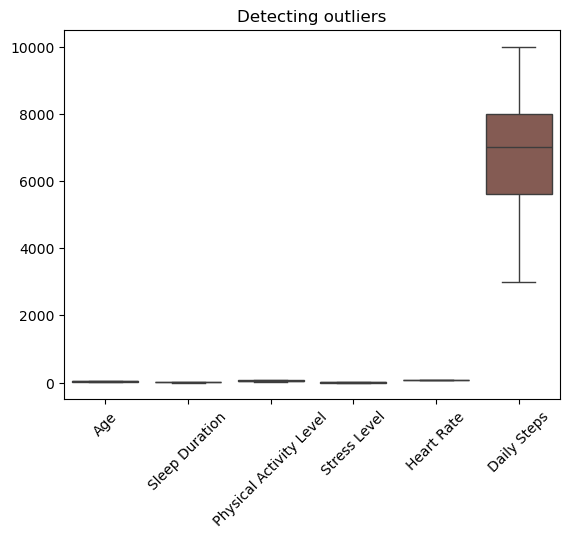

In [31]:
plt.Figure(figsize=(8,6))
sns.boxplot(data=merged_df)
plt.title("Detecting outliers")
plt.xticks(rotation=45)
plt.show()

In [26]:
# First, identify the outlier condition for the 'Heart Rate' and 'Sleep Duration' columns

# For 'Heart Rate' column:
Q1_hr = merged_df['Heart Rate'].quantile(0.25)
Q3_hr = merged_df['Heart Rate'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr
outliers_condition_hr = (merged_df['Heart Rate'] < (Q1_hr - 1.5 * IQR_hr)) | (merged_df['Heart Rate'] > (Q3_hr + 1.5 * IQR_hr))

# For 'Sleep Duration' column:
Q1_sd = merged_df['Sleep Duration'].quantile(0.25)
Q3_sd = merged_df['Sleep Duration'].quantile(0.75)
IQR_sd = Q3_sd - Q1_sd
outliers_condition_sd = (merged_df['Sleep Duration'] < (Q1_sd - 1.5 * IQR_sd)) | (merged_df['Sleep Duration'] > (Q3_sd + 1.5 * IQR_sd))

# Replace outliers with the median value
merged_df.loc[outliers_condition_hr, 'Heart Rate'] = merged_df['Heart Rate'].median()
merged_df.loc[outliers_condition_sd, 'Sleep Duration'] = merged_df['Sleep Duration'].median()

# Verify the changes
print(merged_df[outliers_condition_hr][['Heart Rate']])
print(merged_df[outliers_condition_sd][['Sleep Duration']])


     Heart Rate
3          70.0
4          70.0
5          70.0
6          70.0
16         70.0
18         70.0
80         70.0
81         70.0
93         70.0
145        70.0
147        70.0
264        70.0
266        70.0
276        70.0
277        70.0
    Sleep Duration
19             7.1
21             7.1


In [27]:
merged_df.nunique()

Gender                      2
Age                        40
Occupation                 11
Sleep Duration             32
Quality of Sleep            9
Physical Activity Level    40
Stress Level                8
BMI Category                4
Blood Pressure             27
Heart Rate                 12
Daily Steps                20
Sleep Disorder              2
dtype: int64

In [35]:
merged_df.isnull().sum()

Gender                       0
Age                          0
Occupation                  16
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 1
Blood Pressure               1
Heart Rate                  48
Daily Steps                 48
Sleep Disorder             267
dtype: int64

In [ ]:
merged_df.loc[(merged_df['Age'] < 25) & (merged_df['Occupation'].isna()),'Occupation'] = 'Student'

In [37]:
merged_df.loc[(merged_df['Age'] == 37) & (merged_df['Occupation'].isna()),'Occcupation'] = 'Health Assitant'

In [41]:
merged_df.to_csv('data_sets/final_response.csv')

In [89]:
df = pd.read_csv('data_sets/final_response.csv')

In [90]:
df.head()

,Unnamed: 0,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occcupation
0,0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN,NaN
1,1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
3,3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,70.0,3000.0,Sleep Apnea,NaN
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,70.0,3000.0,Sleep Apnea,NaN


In [91]:
df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0], inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_23444\2216364181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0], inplace=True)


In [92]:
df['BMI Category'].fillna(df['BMI Category'].mode()[0], inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_23444\3360247212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI Category'].fillna(df['BMI Category'].mode()[0], inplace=True)


In [93]:
df['Heart Rate'].value_counts()

Heart Rate
68.0    94
70.0    91
72.0    69
65.0    67
75.0    36
78.0     5
77.0     2
69.0     2
76.0     2
74.0     2
67.0     2
73.0     2
Name: count, dtype: int64

In [94]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Step 2: Define a function to classify Blood Pressure
def categorize_bp(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    
    if systolic < 90 or diastolic < 60:
        return 'Low'
    elif 90 <= systolic <= 120 and 60 <= diastolic <= 80:
        return 'Normal'
    elif 120 < systolic <= 139 or 80 < diastolic <= 89:
        return 'Elevated'
    elif 140 <= systolic <= 159 or 90 <= diastolic <= 99:
        return 'High'
    else:
        return 'Hypertension'

# Step 3: Apply the function to create a new column
df['BP Category'] = df.apply(categorize_bp, axis=1)

# Step 4: Drop unnecessary columns (Optional)
df.drop(columns=['Systolic', 'Diastolic'], inplace=True)
df.drop(columns=['Blood Pressure'], inplace=True)

# Display the DataFrame
print(df)

     Unnamed: 0 Gender  Age            Occupation  Sleep Duration  \
0             0   Male   27     Software Engineer             6.1   
1             1   Male   28                Doctor             6.2   
2             2   Male   28                Doctor             6.2   
3             3   Male   28  Sales Representative             5.9   
4             4   Male   28  Sales Representative             5.9   
..          ...    ...  ...                   ...             ...   
417         417   Male   21               Student             4.5   
418         418   Male   20               Student             7.0   
419         419   Male   23               Student             5.0   
420         420   Male   22               Student             6.0   
421         421   Male   38                   NaN             7.0   

    Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                  6                       42             6   Overweight   
1                  

In [95]:
df['BP Category'].unique()


array(['Elevated', 'High', 'Normal', 'Hypertension'], dtype=object)

In [96]:
# Identify rows with NaN in 'Heart Rate'
import numpy as np

# Identify rows with NaN in 'Heart Rate'
nan_rows = df[df['Heart Rate'].isna()]

# Loop through each BP Category
for category in df['BP Category'].unique():
    # Get non-null heart rates for that BP category
    valid_heart_rates = df[df['BP Category'] == category]['Heart Rate'].dropna().values  # Convert to array
    
    # Check if there are valid values to sample from
    mask = (df['BP Category'] == category) & (df['Heart Rate'].isna())
        
        # Randomly sample and assign to NaN values in the same category
        # Ensure the number of samples corresponds to the number of NaN values
    if valid_heart_rates.size > 0:
        df.loc[mask, 'Heart Rate'] = np.random.choice(valid_heart_rates, size=mask.sum(), replace=True)


In [97]:
df.isnull().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Occupation                  16
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   1
Daily Steps                 48
Sleep Disorder             267
Occcupation                420
BP Category                  0
dtype: int64

In [98]:

df['Heart Rate'].fillna(80.0, inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_23444\755959704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heart Rate'].fillna(80.0, inplace=True)


In [99]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [100]:
df['Occcupation']=df['Occcupation'].astype('object')

In [101]:
df['Occupation'].fillna(('Other'),inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_23444\4009153062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Occupation'].fillna(('Other'),inplace=True)


### EDA

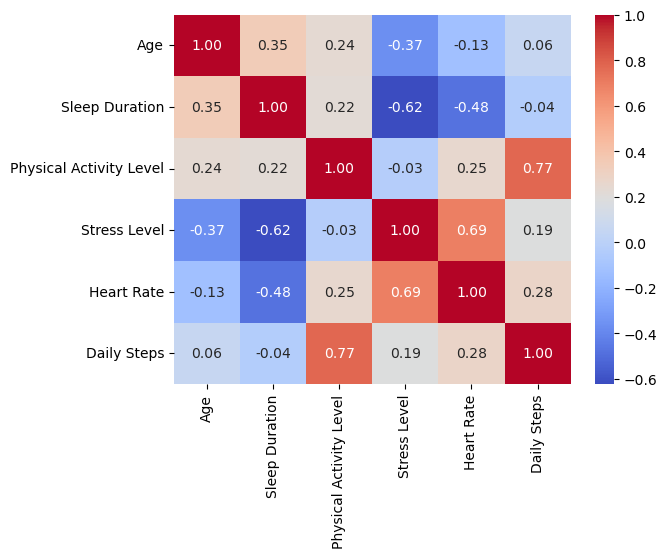

In [102]:
data = df.select_dtypes(include='number')
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

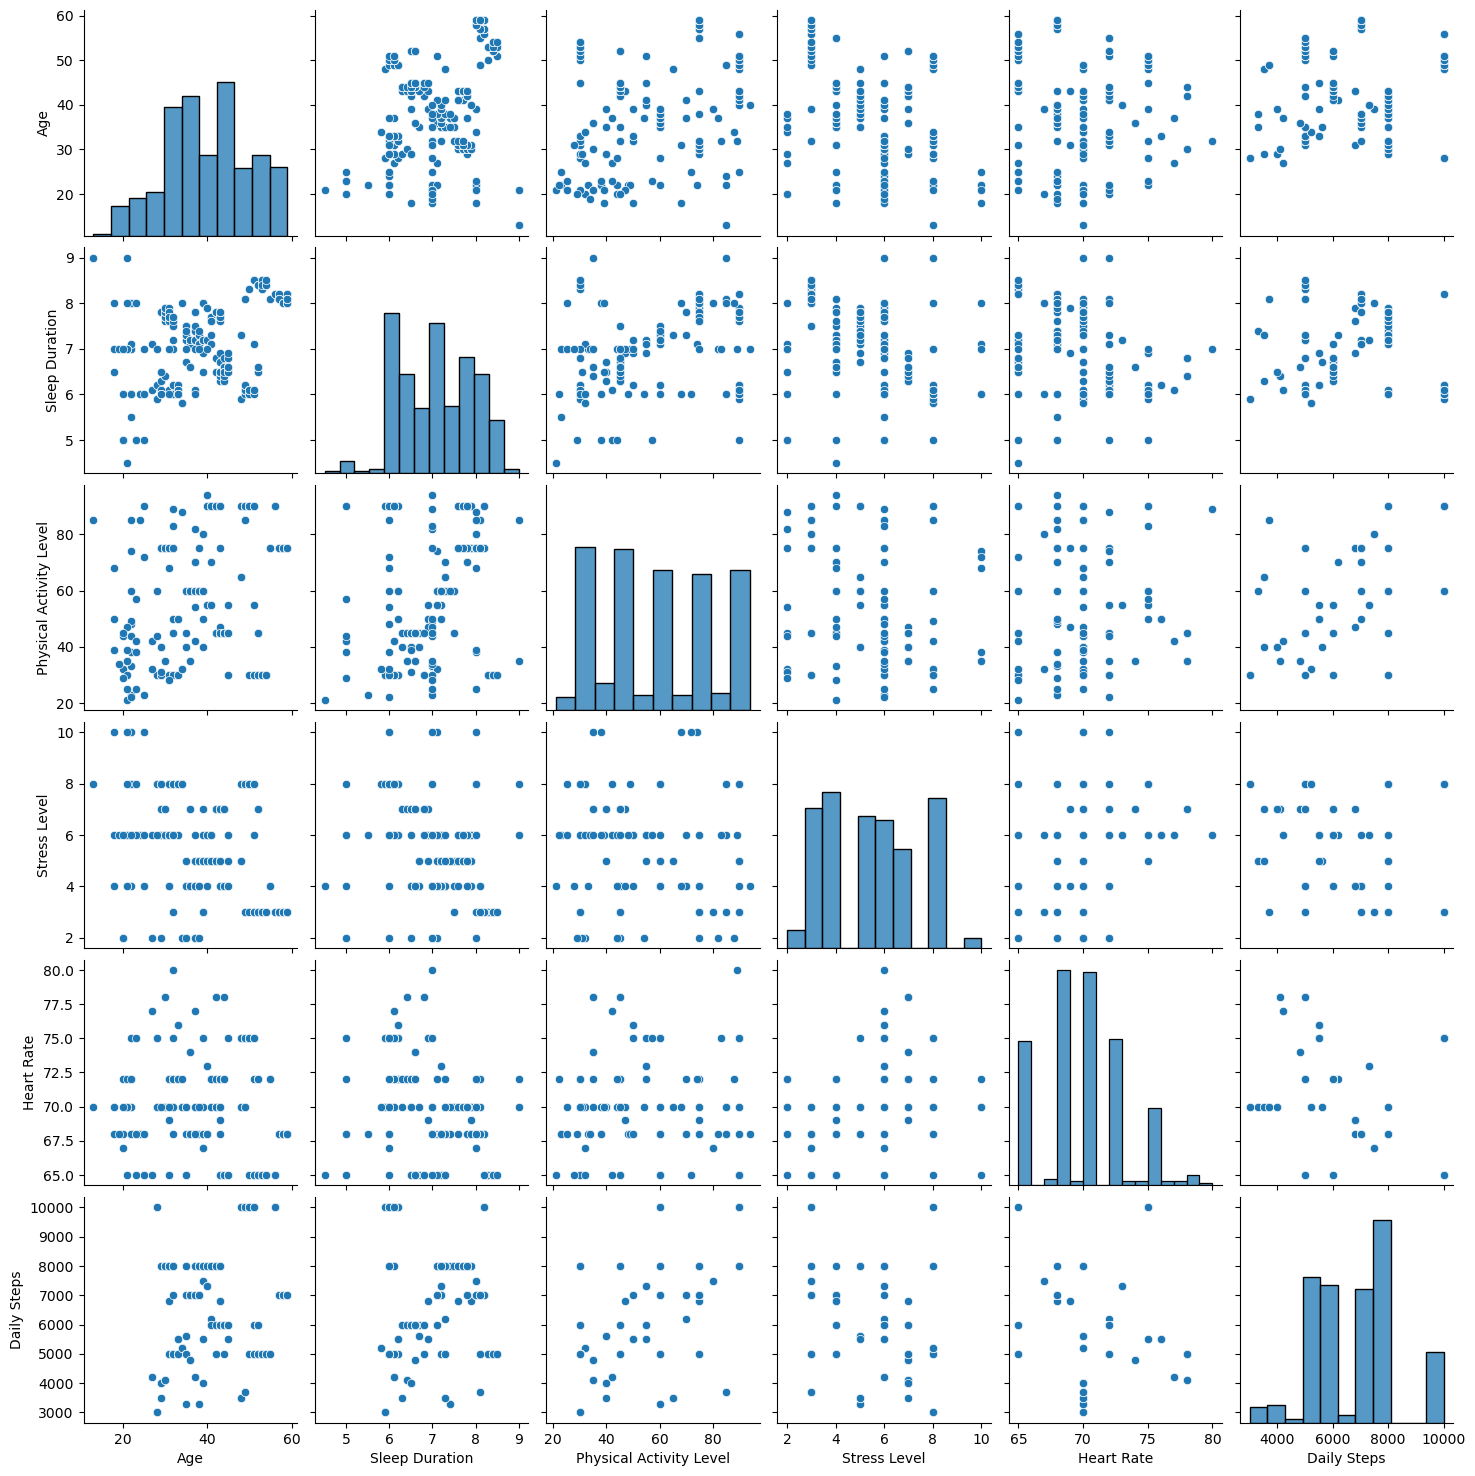

In [103]:

sns.pairplot(data)
plt.show()

In [104]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep            object
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                 float64
Daily Steps                float64
Sleep Disorder              object
Occcupation                 object
BP Category                 object
dtype: object

In [105]:
df.groupby('Occupation')['Occupation'].value_counts()

Occupation
Accountant              37
Doctor                  71
Engineer                63
Lawyer                  47
Manager                  1
Nurse                   73
Other                   16
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Student                 32
Teacher                 40
Name: count, dtype: int64

In [106]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                 48
Sleep Disorder             267
Occcupation                420
BP Category                  0
dtype: int64

In [107]:
df.shape

(422, 13)

In [108]:
df.drop(df.columns[-2], axis=1, inplace=True)

In [109]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'BP Category'],
      dtype='object')

In [110]:
df.isnull().sum()


Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                 48
Sleep Disorder             267
BP Category                  0
dtype: int64

In [111]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [112]:
df = pd.get_dummies(df, columns=['BP Category'], drop_first=True)

df.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,BP Category_High,BP Category_Hypertension,BP Category_Normal
0,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200.0,NaN,True,False,False,False
1,28,Doctor,6.2,6,60,8,Normal,75.0,10000.0,NaN,True,False,False,False
2,28,Doctor,6.2,6,60,8,Normal,75.0,10000.0,NaN,True,False,False,False
3,28,Sales Representative,5.9,4,30,8,Obese,70.0,3000.0,Sleep Apnea,True,True,False,False
4,28,Sales Representative,5.9,4,30,8,Obese,70.0,3000.0,Sleep Apnea,True,True,False,False


In [113]:
df['Quality of Sleep'].value_counts()

Quality of Sleep
8          109
6          105
7           77
9           71
Good        27
Average     18
5            7
4            5
Poor         3
Name: count, dtype: int64

In [114]:
import numpy as np

def quality_of_sleep(value):
    if value == 'Average':
        return np.random.randint(4, 6)  # Randomly assign 4 or 5
    elif value == 'Good':
        return np.random.randint(7, 9)  # Randomly assign 7 or 8
    elif value == 'Poor':
        return np.random.randint(1, 3)  # Randomly assign 1 or 2
    return value  # Keep other values unchanged

df['Quality of Sleep'] = df['Quality of Sleep'].apply(quality_of_sleep)


In [115]:
df.dtypes

Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep             object
Physical Activity Level       int64
Stress Level                  int64
BMI Category                 object
Heart Rate                  float64
Daily Steps                 float64
Sleep Disorder               object
Gender_Male                    bool
BP Category_High               bool
BP Category_Hypertension       bool
BP Category_Normal             bool
dtype: object

In [116]:
df.isnull().sum()

Age                           0
Occupation                    0
Sleep Duration                0
Quality of Sleep              0
Physical Activity Level       0
Stress Level                  0
BMI Category                  0
Heart Rate                    0
Daily Steps                  48
Sleep Disorder              267
Gender_Male                   0
BP Category_High              0
BP Category_Hypertension      0
BP Category_Normal            0
dtype: int64

In [117]:
df['Daily Steps'].fillna(df['Daily Steps'].mean(), inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_23444\3533070632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Daily Steps'].fillna(df['Daily Steps'].mean(), inplace=True)


In [118]:
df['Daily Steps'].fillna(4000)

0       4200.00000
1      10000.00000
2      10000.00000
3       3000.00000
4       3000.00000
          ...     
417     6816.84492
418     6816.84492
419     6816.84492
420     6816.84492
421     6816.84492
Name: Daily Steps, Length: 422, dtype: float64

In [ ]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('Normal')

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,BP Category_High,BP Category_Hypertension,BP Category_Normal
0,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200.0,Normal,True,False,False,False
1,28,Doctor,6.2,6,60,8,Normal,75.0,10000.0,Normal,True,False,False,False
2,28,Doctor,6.2,6,60,8,Normal,75.0,10000.0,Normal,True,False,False,False
3,28,Sales Representative,5.9,4,30,8,Obese,70.0,3000.0,Sleep Apnea,True,True,False,False
4,28,Sales Representative,5.9,4,30,8,Obese,70.0,3000.0,Sleep Apnea,True,True,False,False


In [120]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sleep Disorder_Label'] = encoder.fit_transform(df['Sleep Disorder'])

In [133]:

df['Occupation_cod'] = encoder.fit_transform(df['Occupation'])

print('\n', df[['Occupation', 'Occupation_cod']].value_counts())
df.head()


 Occupation            Occupation_cod
Nurse                 5                 73
Doctor                1                 71
Engineer              2                 63
Lawyer                3                 47
Teacher               12                40
Accountant            0                 37
Salesperson           8                 32
Student               11                32
Other                 6                 16
Scientist             9                  4
Software Engineer     10                 4
Sales Representative  7                  2
Manager               4                  1
Name: count, dtype: int64


,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,BP Category_High,BP Category_Hypertension,BP Category_Normal,Sleep Disorder_Label,Occupation_cod
0,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200.0,Normal,True,False,False,False,1,10
1,28,Doctor,6.2,6,60,8,Normal,75.0,10000.0,Normal,True,False,False,False,1,1
2,28,Doctor,6.2,6,60,8,Normal,75.0,10000.0,Normal,True,False,False,False,1,1
3,28,Sales Representative,5.9,4,30,8,Obese,70.0,3000.0,Sleep Apnea,True,True,False,False,2,7
4,28,Sales Representative,5.9,4,30,8,Obese,70.0,3000.0,Sleep Apnea,True,True,False,False,2,7


In [131]:
df.to_csv('data_sets/cleaned_data.csv')

In [137]:
df.drop(columns=['Occupation','BMI Category','Sleep Disorder'],inplace=True)
df.isnull().sum()

Age                         0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
Heart Rate                  0
Daily Steps                 0
Gender_Male                 0
BP Category_High            0
BP Category_Hypertension    0
BP Category_Normal          0
Sleep Disorder_Label        0
Occupation_cod              0
dtype: int64

In [139]:
X = df.drop(columns=['Sleep Disorder_Label'])
Y = df['Sleep Disorder_Label']

In [140]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [141]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(random_state=15, max_depth=4)
dt.fit(X_train, Y_train)
dt.fit(X_val,Y_val)

RandomForestClassifier(max_depth=4, random_state=15)

In [146]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_val)
# Assuming y_test contains the true labels and y_pred contains predicted labels
accuracy = accuracy_score(Y_val, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9473684210526315


In [147]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
# Assuming y_test contains the true labels and y_pred contains predicted labels
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8604651162790697


In [148]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_train)
# Assuming y_test contains the true labels and y_pred contains predicted labels
accuracy = accuracy_score(Y_train, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8908450704225352


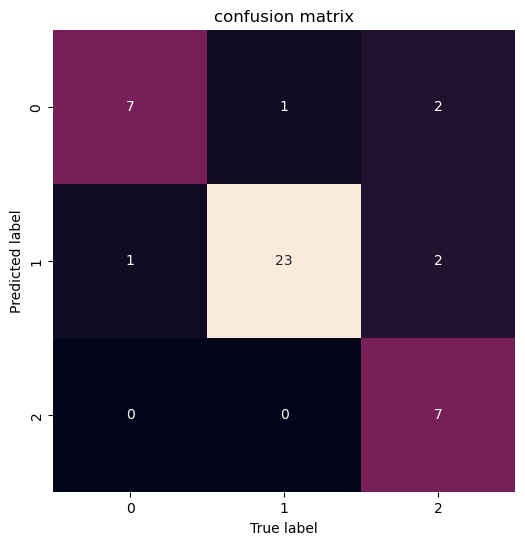

In [150]:
# confusion matrix
from sklearn.metrics import confusion_matrix
Y_pred = dt.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=set(Y_test), yticklabels=set(Y_test))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('confusion matrix')
plt.show()

In [151]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Assuming Y_test is the actual labels and Y_pred is the predicted labels from the model
print("F1 Score:", f1_score(Y_test, Y_pred, average='macro'))
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))
print("Accuracy:", accuracy_score(Y_test, Y_pred))


F1 Score: 0.8251851851851852
Recall: 0.8232323232323232
Precision: 0.8615384615384615
Accuracy: 0.8604651162790697


In [153]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

smote_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(Y_resampled, columns=["Sleep Disorder_Label"])], axis=1)
Y_resampled.value_counts()

Sleep Disorder_Label
1    267
2    267
0    267
Name: count, dtype: int64

In [154]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=42))])

pipeline1.fit(X_train_smote, Y_train_smote)
Y_pred_smote = pipeline1.predict(X_test_smote)

print("Accuracy:", accuracy_score(Y_test_smote, Y_pred_smote))

Accuracy: 0.937888198757764


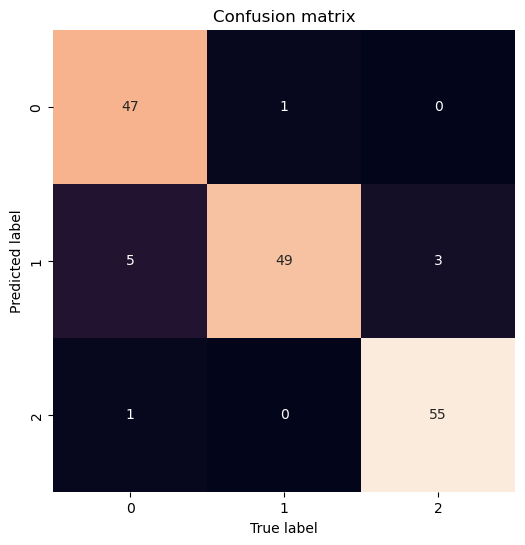

In [156]:
cm = confusion_matrix(Y_test_smote, Y_pred_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=set(Y_test_smote), yticklabels=set(Y_test_smote))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

In [157]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(Y_test_smote, Y_pred_smote))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.86      0.98      0.92        50
           2       0.98      0.95      0.96        58

    accuracy                           0.94       161
   macro avg       0.94      0.94      0.94       161
weighted avg       0.94      0.94      0.94       161



In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize



# Predict probabilities for the test set
y_prob = pipeline1.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Compute the ROC curve

# Binarize the labels for multi-class
Y_bin = label_binarize(Y_test, classes=[0, 1, 2])  # For a 3-class problem (adjust classes as needed)

# Calculate ROC-AUC for each class using One-vs-Rest approach
roc_auc = roc_auc_score(Y_bin, pipeline1.predict_proba(X_test), average='macro', multi_class='ovr')

print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.9734297865876812


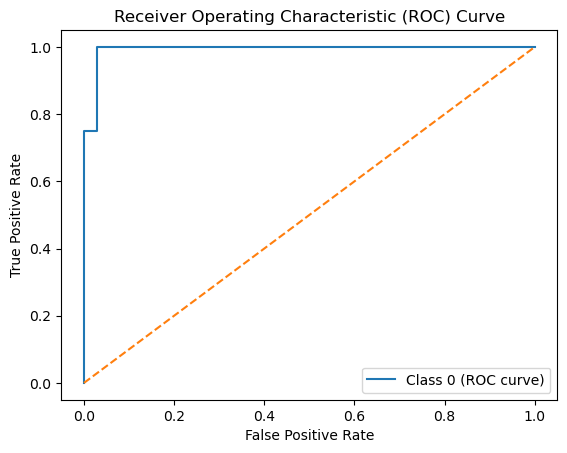

In [161]:
from sklearn.metrics import roc_curve

# One-vs-Rest strategy for multiclass classification
n_classes = 3  # Adjust according to the number of classes

# Binarize the labels
y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])

# Compute ROC curve for each class
fpr, tpr, _ = roc_curve(y_test_bin[:,0], pipeline1.predict_proba(X_test)[:,0])
plt.plot(fpr, tpr, label='Class 0 (ROC curve)')

# Add other classes similarly
# Plotting settings
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [165]:
import joblib
joblib.dump(pipeline1, 'model/randomforest.pkl')

['model/randomforest.pkl']